In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Stock prediction using Linear regression**

In [54]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

**Price pridtion using Linear regression Model**

In [55]:
df = pd.read_csv('/kaggle/input/allinone/data_one_last_time.csv')

In [56]:
df

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,20_EMA,50_EMA,200_EMA,ITC,HUL,SBI,INFY,HDFC,Diff,Movements
0,2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92,1596.628571,1594.023529,1592.662687,712.35,2281.05,259.10,16855.90,173.80,46.50,0.0
1,2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95,1596.549660,1594.093195,1592.693904,726.20,2199.90,248.45,15507.45,166.95,-42.90,1.0
2,2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94,1598.554454,1595.015030,1592.941725,784.30,2288.20,261.00,14266.85,168.30,21.80,0.0
3,2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94,1599.958792,1595.732088,1593.144295,847.05,2412.95,273.30,13125.50,168.35,-4.30,1.0
4,2000-01-10,1615.65,1662.10,1614.95,1632.95,45013949,2.375350e+10,26.57,4.74,0.93,1603.100812,1597.191614,1593.540372,914.85,2431.25,269.50,13757.30,165.90,19.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,2021-04-23,14326.35,14461.15,14273.30,14341.35,476613608,3.189466e+11,32.07,4.11,1.00,14577.356574,14594.833983,13306.071399,205.35,2307.75,336.45,1333.80,1414.15,-64.80,1.0
5300,2021-04-26,14449.45,14557.50,14421.30,14485.00,448533329,3.315616e+11,32.39,4.15,0.99,14568.560709,14590.526768,13317.802032,205.30,2360.65,344.30,1343.55,1404.80,143.65,1.0
5301,2021-04-27,14493.80,14667.55,14484.85,14653.05,442211685,3.218114e+11,32.28,4.20,0.98,14576.607309,14592.978660,13331.088082,205.40,2379.85,353.05,1348.50,1438.70,168.05,1.0
5302,2021-04-28,14710.50,14890.25,14694.95,14864.55,453990807,3.765011e+11,32.72,4.26,0.96,14604.030422,14603.628516,13346.346409,205.50,2406.55,363.40,1356.00,1476.80,211.50,1.0


In [57]:
df = df.drop(["Movements",'Open','High','Low', 'P/E', 'P/B', 'Div Yield'],axis = 1)
df

,Date,Close,Volume,Turnover,20_EMA,50_EMA,200_EMA,ITC,HUL,SBI,INFY,HDFC,Diff
0,2000-01-04,1638.70,38787872,1.973690e+10,1596.628571,1594.023529,1592.662687,712.35,2281.05,259.10,16855.90,173.80,46.50
1,2000-01-05,1595.80,62153431,3.084790e+10,1596.549660,1594.093195,1592.693904,726.20,2199.90,248.45,15507.45,166.95,-42.90
2,2000-01-06,1617.60,51272875,2.531180e+10,1598.554454,1595.015030,1592.941725,784.30,2288.20,261.00,14266.85,168.30,21.80
3,2000-01-07,1613.30,54315945,1.914630e+10,1599.958792,1595.732088,1593.144295,847.05,2412.95,273.30,13125.50,168.35,-4.30
4,2000-01-10,1632.95,45013949,2.375350e+10,1603.100812,1597.191614,1593.540372,914.85,2431.25,269.50,13757.30,165.90,19.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,2021-04-23,14341.35,476613608,3.189466e+11,14577.356574,14594.833983,13306.071399,205.35,2307.75,336.45,1333.80,1414.15,-64.80
5300,2021-04-26,14485.00,448533329,3.315616e+11,14568.560709,14590.526768,13317.802032,205.30,2360.65,344.30,1343.55,1404.80,143.65
5301,2021-04-27,14653.05,442211685,3.218114e+11,14576.607309,14592.978660,13331.088082,205.40,2379.85,353.05,1348.50,1438.70,168.05
5302,2021-04-28,14864.55,453990807,3.765011e+11,14604.030422,14603.628516,13346.346409,205.50,2406.55,363.40,1356.00,1476.80,211.50


In [58]:
df.head(5)

,Date,Close,Volume,Turnover,20_EMA,50_EMA,200_EMA,ITC,HUL,SBI,INFY,HDFC,Diff
0,2000-01-04,1638.70,38787872,1.973690e+10,1596.628571,1594.023529,1592.662687,712.35,2281.05,259.10,16855.90,173.80,46.50
1,2000-01-05,1595.80,62153431,3.084790e+10,1596.549660,1594.093195,1592.693904,726.20,2199.90,248.45,15507.45,166.95,-42.90
2,2000-01-06,1617.60,51272875,2.531180e+10,1598.554454,1595.015030,1592.941725,784.30,2288.20,261.00,14266.85,168.30,21.80
3,2000-01-07,1613.30,54315945,1.914630e+10,1599.958792,1595.732088,1593.144295,847.05,2412.95,273.30,13125.50,168.35,-4.30
4,2000-01-10,1632.95,45013949,2.375350e+10,1603.100812,1597.191614,1593.540372,914.85,2431.25,269.50,13757.30,165.90,19.65


In [59]:
start_date = '2007-11-27'
end_date = '2020-11-27'

fill = (df ['Date']>=start_date) & (df ['Date']<=end_date)
df = df .loc[fill]

In [60]:
x=df[['Volume','Turnover','20_EMA','50_EMA','200_EMA']].values
y=df['Close'].values

In [61]:
print(len(df))


3220


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [63]:
regressor=LinearRegression()


In [64]:
regressor.fit(x_train,y_train)

LinearRegression()

In [65]:
print(regressor.coef_)
print(regressor.intercept_)

[-4.69299752e-07  9.72735707e-10  1.88595944e+00 -1.11030113e+00
  2.26434838e-01]
26.444332719906924


In [66]:
predicted=regressor.predict(x_test)
print(predicted)

[ 5121.22717085  5410.55683883  8060.03538483  5719.33847919
  6518.97984729  7995.61223668  5102.49663955  5229.56124345
 10804.93938001  5786.76591747 11550.93388799  8980.06910275
 10172.36432057  5710.56950289  4645.89798639 11524.58468919
  5198.99937778  4993.31508786 11589.30223467  5029.22159707
  7899.37655634  4946.31950398  6169.74699422  2825.88259913
  2800.85549897  5824.35917541  6803.65206042  5889.66892694
  4970.28945166  5161.54369305 11812.43139831  5044.53379883
  6210.36507257  3271.05931641  5071.24386921  5626.27996759
 10425.85198506  5449.38772025  4483.67461654  5795.98681501
  5039.41805817 11165.99207337  9992.32014597 10669.97203204
  4981.96342362 11938.88785379 11734.62114486 11963.53124079
  8531.29220491  9927.69086502  2877.08530329  6100.46856906
 11442.00193987  8098.53570274  5577.37060369  6075.21799463
  6076.43863417 11781.91305589  5310.05193776 11923.5663085
 10760.95325442 11012.07641407 10013.20957065  8749.76094611
  5453.61061048  6221.859

In [67]:
dataframe=pd.DataFrame({'Actual':y_test.flatten(),'predicted':predicted.flatten()})
dataframe.head(4)

,Actual,predicted
0,5007.90,5121.227171
1,5471.25,5410.556839
2,8017.55,8060.035385
3,5697.70,5719.338479


In [68]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
# Printout relevant metrics
#print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, predicted))
print("Mean squared Error:",metrics.mean_squared_error(y_test, predicted))
print("root mean squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 116.68842562465457
Mean squared Error: 28136.14669576653
root mean squared Error: 167.73832804629515


<AxesSubplot:>

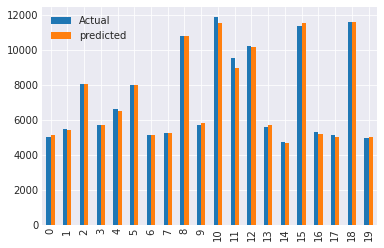

In [69]:
graph=dataframe.head(20)
graph.plot(kind="bar")

In [70]:
actual_price=df.tail(1)
actual_price

,Date,Close,Volume,Turnover,20_EMA,50_EMA,200_EMA,ITC,HUL,SBI,INFY,HDFC,Diff
5202,2020-11-27,12968.95,1162360673,7.852293e+11,12637.773522,12164.053349,11318.801295,193.65,2138.2,244.25,1100.0,1440.85,-18.05


In [71]:
#Fine tuning of regressor

# idx = range(len(df))  # Set of indices for the whole dataset
# test_idx = [0, 50, 100]      # Choose 3 of them, arbitrarily, that will help
#                              # build a test set
# train_idx = [i for i in idx if i not in test_idx]

# from sklearn.model_selection import PredefinedSplit
# split_index = [-1 if x in train_idx else 0 for x in range(X_train.shape[0])]
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# param_distribs = {
#         'n_estimators': randint(low=5, high=200),
#         'max_depth': randint(low=1, high=3),
#     }

# lgbm_srch = LinearRegression()
# pds = PredefinedSplit(test_fold = split_index)

# rnd_search = RandomizedSearchCV(lgbm_srch, param_distributions=param_distribs,
#                                 n_iter=20, cv=pds, scoring='neg_mean_squared_error')

# rnd_search.fit(X_train, y_train)
# performance(log_test_prices,rnd_search.best_estimator_.predict(test_data))

**Price pridtion using SVR Model**

In [72]:
df=df.head(len(df)-1)

days = list()
adj_close_prices = list()

df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Close']


In [73]:
for day in df_days:
    days.append( [int(day.split('-')[2])] )

In [74]:
for adj_close_price in df_adj_close:
    adj_close_prices.append( float(adj_close_price) )

In [75]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

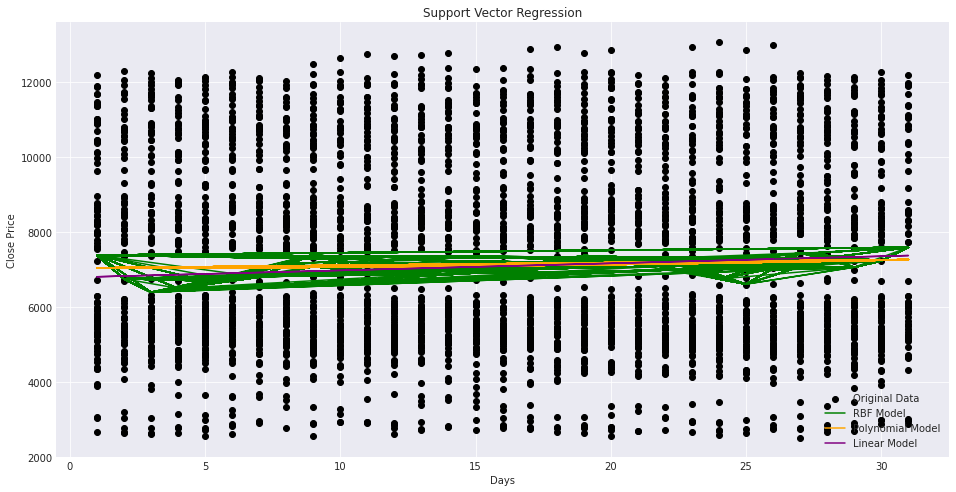

In [76]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [77]:
day=[[30]]
print('The RBF SVR predicted:',rbf_svr.predict(day ))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [7229.84985268]
The Linear SVR predicted: [7353.26999993]
The Polynomial SVR predicted: [7249.12143293]


In [78]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and predicted are defined
rmse = np.sqrt(mean_squared_error(y_test, predicted))

# Calculate the range of the target variable
target_range = np.max(y_test) - np.min(y_test)

# Calculate Percentage RMSE
prmse = (rmse / target_range) * 100

print("Percentage RMSE:", prmse)


Percentage RMSE: 1.5972036568872134


In [81]:
print(rmse)

167.73832804629515
